In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib notebook

In [2]:
ticker = 'META'

start = '2023-03-14'

end = '2024-03-15'

data = pdr.get_data_yahoo(ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Simple Moving Average (SMA) calculation for 10 days
data['MA10'] = data['Close'].rolling(10).mean() 

<IPython.core.display.Javascript object>


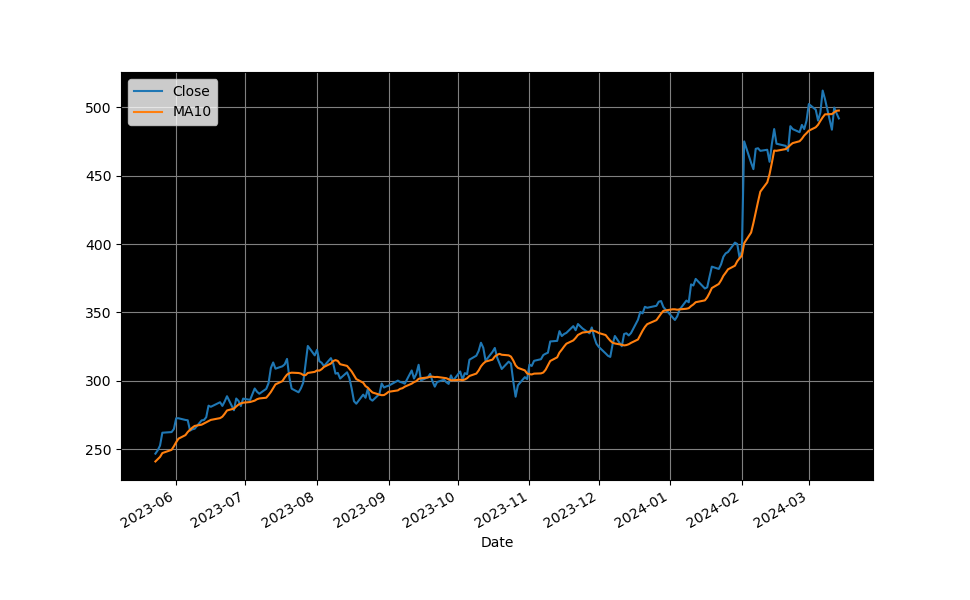

In [4]:
fig, ax = plt.subplots(figsize = (9.7,6))
data['2023-5-23':][['Close', 'MA10']].plot(ax=ax)
ax.grid(True, color='gray')
ax.set_facecolor('black')
ax.figure.set_facecolor('white')
ax.figure.autofmt_xdate()
ax.xaxis_date()
plt.show()

In [5]:
# Simple Moving Average 50 days
data['MA50'] = data['Close'].rolling(50).mean() 

<IPython.core.display.Javascript object>


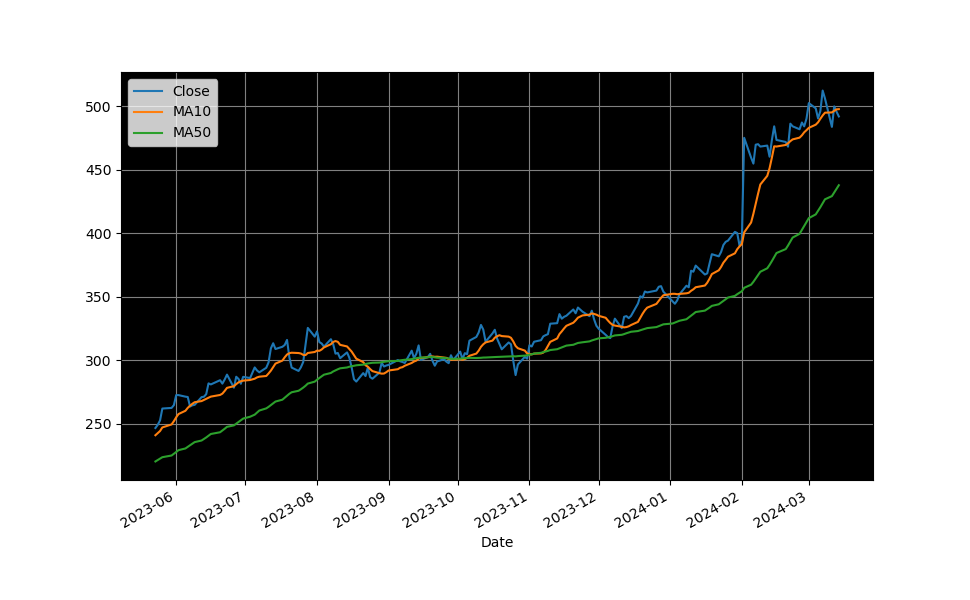

In [6]:
fig, ax = plt.subplots(figsize = (9.7,6))
data['2023-5-23':][['Close', 'MA10', 'MA50']].plot(ax=ax)
ax.grid(True, color='gray')
ax.set_facecolor('black')
ax.figure.set_facecolor('white')
ax.figure.autofmt_xdate()
ax.xaxis_date()
plt.show()

# if blue line is above MA, thats a signal to buy

In [7]:
# Adding a signal to buy or sell the stock in the DataFrame (if True, that's a signal to buy)
data['Signal'] = data['Close'] > data['MA10']
data

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Signal
Date,,,,,,,,,
2023-03-14,187.580002,194.320007,186.559998,194.020004,193.814362,41642600,NaN,NaN,False
2023-03-15,192.949997,197.779999,190.839996,197.750000,197.540405,42123600,NaN,NaN,False
2023-03-16,198.259995,205.759995,196.089996,204.929993,204.712784,50447100,NaN,NaN,False
2023-03-17,200.559998,201.899994,195.429993,195.610001,195.402679,50141100,NaN,NaN,False
2023-03-20,198.479996,199.360001,193.639999,197.809998,197.600342,25186300,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2024-03-08,514.190002,523.570007,499.350006,505.950012,505.950012,18575200,494.787997,426.6272,True
2024-03-11,497.010010,497.320007,476.000000,483.589996,483.589996,20428300,494.972998,429.1424,False
2024-03-12,493.260010,502.309998,484.730011,499.750000,499.750000,15448200,496.242999,431.9710,True


In [8]:
# Exponential Moving Average (EMA) calculation
# Calculate the 50-day Exponential Moving Average (EMA) of the closing prices
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()

<IPython.core.display.Javascript object>


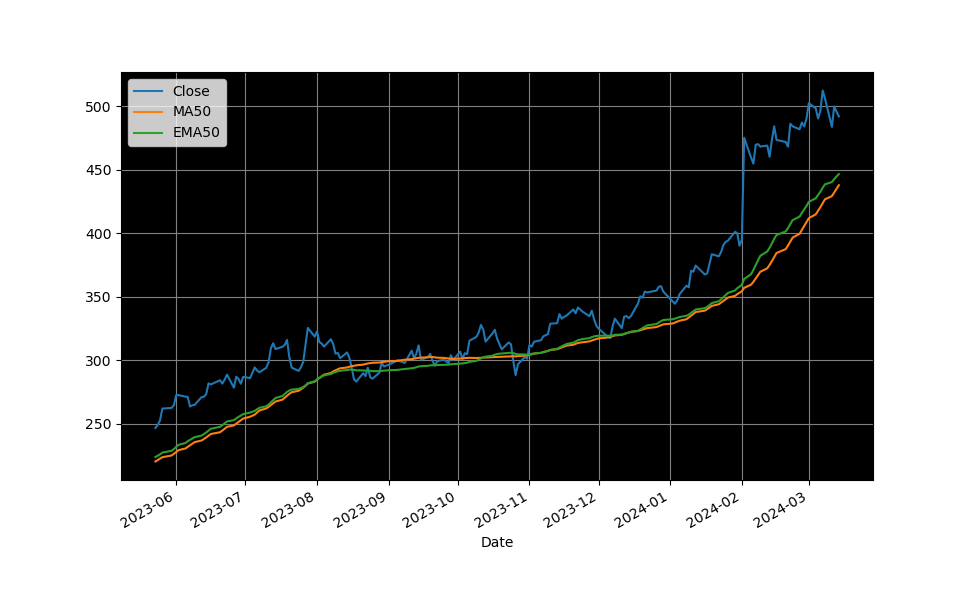

In [9]:
fig, ax = plt.subplots(figsize = (9.7,6))
data[['Close', 'MA50','EMA50']].loc['2023-5-23':].plot(ax = ax)
ax.grid(True, color='gray')
ax.set_facecolor('black')
ax.figure.set_facecolor('white')
ax.figure.autofmt_xdate()
ax.xaxis_date()
plt.show()

In [10]:
# MACD calculation
# Calculate the 12-day Exponential Moving Average (EMA) of the closing prices
exp1 = data['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-day Exponential Moving Average (EMA) of the closing prices
exp2 = data['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line by subtracting the 26-day EMA from the 12-day EMA
data['MACD'] = exp1 - exp2

# Calculate the 9-day Exponential Moving Average (EMA) of the MACD line to get the Signal line
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Signal,EMA50,MACD,Signal line
Date,,,,,,,,,,,,
2024-03-08,514.190002,523.570007,499.350006,505.950012,505.950012,18575200,494.787997,426.6272,True,438.411102,21.390701,22.704273
2024-03-11,497.010010,497.320007,476.000000,483.589996,483.589996,20428300,494.972998,429.1424,False,440.182824,19.083113,21.980041
2024-03-12,493.260010,502.309998,484.730011,499.750000,499.750000,15448200,496.242999,431.9710,True,442.518791,18.346820,21.253397
2024-03-13,495.390015,500.980011,491.029999,495.570007,495.570007,12090700,497.398001,434.8032,False,444.599231,17.227425,20.448203
2024-03-14,500.260010,501.350006,488.160004,491.829987,491.829987,12620000,497.567999,437.7140,False,446.451418,15.855733,19.529709


<IPython.core.display.Javascript object>


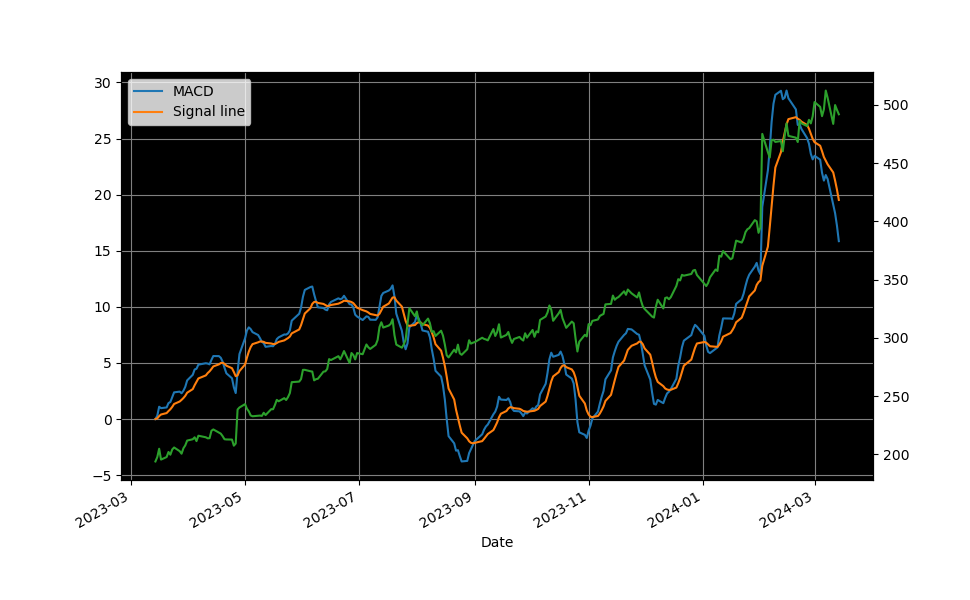

In [11]:
fig, ax = plt.subplots(figsize = (9.7,6))
data[['MACD','Signal line']].plot(ax = ax)
data['Close'].plot(ax = ax, secondary_y = True)
ax.grid(True, color='gray')
ax.set_facecolor('black')
ax.figure.set_facecolor('white')
ax.figure.autofmt_xdate()
ax.xaxis_date()
plt.show()

In [12]:
# Stochastic Oscillator calculation
# Calculate the highest high in the last 14 days
high14 = data['High'].rolling(14).max()

# Calculate the lowest low in the last 14 days
low14 = data['Low'].rolling(14).min()

# Calculate %K, which represents the position of the closing price relative to the high-low range
pct_k = (data['Close'] - low14) * 100 / (high14 - low14)

# Calculate %D, which is the 3-day simple moving average of %K
pct_d = pct_k.rolling(3).mean()

<IPython.core.display.Javascript object>


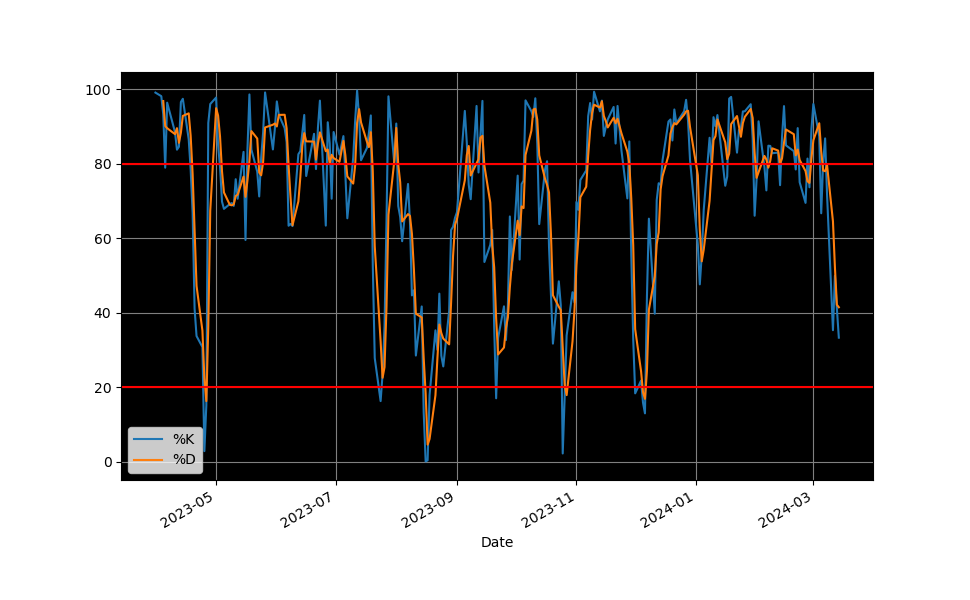

In [13]:
fig, ax = plt.subplots(figsize=(9.7, 6))
pct_k.plot(ax=ax, label='%K')
pct_d.plot(ax=ax, label='%D')
ax.legend()
ax.axhline(80, c = 'r')
ax.axhline(20, c = 'r')
ax.grid(True, color='gray')
ax.set_facecolor('black')
ax.figure.set_facecolor('white')
ax.figure.autofmt_xdate()
ax.xaxis_date()
plt.show()